In [1]:
import random, time
from IPython import display             # type: ignore
from PIL import Image, ImageDraw        # type: ignore


In [2]:
random.seed(42)

# Definição das características
GENE_LENGTH = 20                        # Cada mariposa é representada por uma string de 10 números de 0 a 255.
GENERATIONS = 100
POPULATION_SIZE = 20
MUTATION_RATE = 0.01

# Ambiente (0 para claro, 255 para escuro)
environment = 200  # Vamos assumir que o ambiente é um tom de cinza


In [3]:
def create_genome():
    return [random.randint(0, 255) for _ in range(GENE_LENGTH)]

def create_population():
    return [create_genome() for _ in range(POPULATION_SIZE)]

def fitness(genome):
    # Calcula a diferença média entre os genes da mariposa e o ambiente
    return -sum(abs(gene - environment) for gene in genome) / GENE_LENGTH

def selection(population):
    scored = sorted(population, key=fitness, reverse=True)
    return scored[:5]  # Seleciona os 5 melhores

def crossover(parent1, parent2):
    point = random.randint(1, GENE_LENGTH - 1)
    return parent1[:point] + parent2[point:]

def mutate(genome):
    return [random.randint(0, 255) if random.random() < MUTATION_RATE else gene for gene in genome]


In [4]:
_history = []

population = create_population()                                                # Implementação do algoritmo genético
best_population = []

for generation in range(GENERATIONS):                                           # Execução do algoritmo genético

    print(f"Geração {generation}: Melhor fitness = {max(population, key=fitness)}")
    
    best_population.append(population)                                          # Armazena a população para visualização final

    parents = selection(population)                                             # Seleção

    new_population = []
    while len(new_population) < POPULATION_SIZE:                                # Nova população
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

    _history.append( population.copy() )


Geração 0: Melhor fitness = [151, 65, 98, 215, 194, 89, 154, 207, 0, 155, 146, 107, 220, 164, 238, 226, 226, 109, 242, 86]
Geração 1: Melhor fitness = [151, 65, 98, 215, 194, 89, 154, 207, 0, 155, 146, 107, 220, 164, 238, 226, 226, 109, 242, 206]
Geração 2: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 0, 155, 146, 107, 220, 164, 238, 226, 179, 156, 116, 114]
Geração 3: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 0, 155, 146, 107, 220, 164, 238, 226, 179, 109, 242, 206]
Geração 4: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 67, 155, 146, 107, 220, 164, 238, 226, 226, 109, 242, 206]
Geração 5: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 109, 155, 146, 107, 220, 164, 238, 226, 226, 109, 196, 206]
Geração 6: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 109, 155, 146, 107, 220, 164, 238, 226, 226, 175, 196, 206]
Geração 7: Melhor fitness = [151, 220, 98, 215, 194, 89, 154, 207, 109, 155, 146, 107, 220, 164, 238, 226, 226, 175, 196, 2

In [5]:
def draw_population(individuals, tile_size=40, grid_size_x=10, grid_size_y=10, bg_color=(127, 127, 127)):
    canvas_size = grid_size_x * tile_size
    image = Image.new("RGB", (canvas_size, canvas_size), bg_color)
    draw_context = ImageDraw.Draw(image)

    for y in range(grid_size_y):
        for x in range(grid_size_x):
            x0 = x * tile_size;  y0 = y * tile_size
            x1 = x0 + tile_size; y1 = y0 + tile_size

            margin_x = tile_size * 0.05
            margin_y = tile_size * 0.05

            x0 += margin_x; y0 += margin_y
            x1 -= margin_x; y1 -= margin_y

            if y < len(individuals) and x < len(individuals[y]):
                color_value = individuals[y][x]
            else:
                # Se o índice está fora da matriz, pintamos de preto
                color_value = 0
            color = (color_value, color_value, color_value)

            draw_context.rectangle([x0, y0, x1, y1], fill=color, outline="gray")

    display.display(image)
    display.clear_output(wait=True)

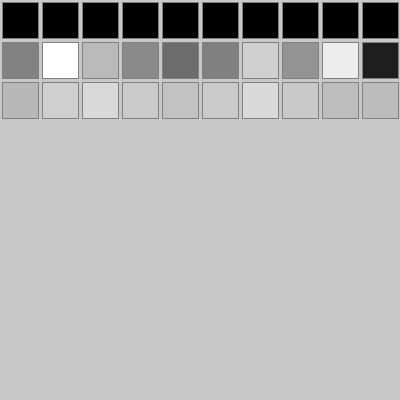

In [8]:
# Example of Bad Population: All moths have values that are far from the environment (200)
bad_population = [[0 for _ in range(10)] for _ in range(10)]  # All values are 0

# Example of Median Population: Moths with mixed values, some close, others far from the environment
median_population = [[random.randint(0, 255) for _ in range(10)] for _ in range(10)]
# Adjusting so that, on average, the values are close to 100 (a darker gray tone than the environment)
median_population = [[min(int(gene + random.randint(-50, 50)), 255) for gene in row] for row in median_population]

# Example of Good Population: Moths with values close to the environment (200)
good_population = [[random.randint(180, 220) for _ in range(10)] for _ in range(10)]  # Values close to 200

sample = [ bad_population[0], median_population[0], good_population[0] ]

draw_population(sample, bg_color=(200, 200, 200), grid_size_x=10, grid_size_y=3)

idx: 100


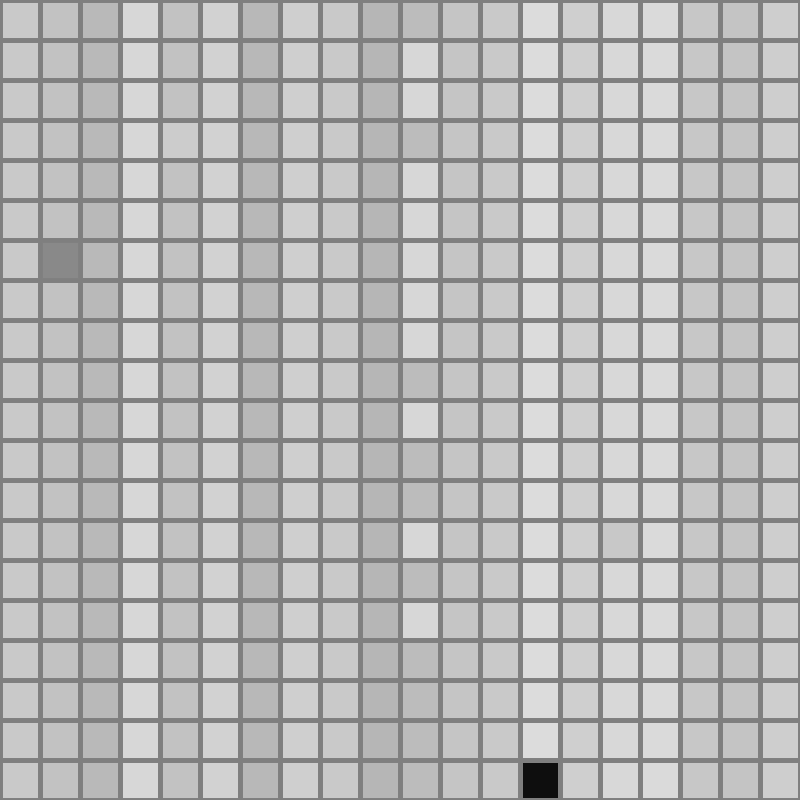

In [7]:
# Visualização final
print("Resultado final:")

for idx, i in enumerate(_history):
    print('idx:', idx+1)
    draw_population( i, tile_size=40, bg_color=(127, 127, 127), grid_size_x=POPULATION_SIZE, grid_size_y=GENE_LENGTH )
    time.sleep(0.05)

# obs: 
#
# Indivíduo N = POPULATION_SIZE
# gene_N = GENE_LENGTH
#
# Indivíduo 01: [gene1, gene2, ..., gene_N]
# Indivíduo 02: [gene1, gene2, ..., gene_N]
# ...
# Indivíduo N : [gene1, gene2, ..., gene_N]